In [1]:
from inda_mir.modeling.models import *
from inda_mir.modeling.evaluation import *
from inda_mir.modeling.train_test_split import load_data

In [2]:
data = load_data('random_split.data')

In [3]:
X_train, y_train = data.get_numpy_train_data()
X_test, y_test = data.get_numpy_test_data()

In [4]:
data.get_features_names()

Index(['average_loudness', 'barkbands_crest_dmean', 'barkbands_crest_dmean2',
       'barkbands_crest_dvar', 'barkbands_crest_dvar2', 'barkbands_crest_max',
       'barkbands_crest_mean', 'barkbands_crest_median', 'barkbands_crest_min',
       'barkbands_crest_stdev',
       ...
       'zerocrossingrate_dmean', 'zerocrossingrate_dmean2',
       'zerocrossingrate_dvar', 'zerocrossingrate_dvar2',
       'zerocrossingrate_max', 'zerocrossingrate_mean',
       'zerocrossingrate_median', 'zerocrossingrate_min',
       'zerocrossingrate_stdev', 'zerocrossingrate_var'],
      dtype='object', length=2646)

# Random Forest

In [16]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

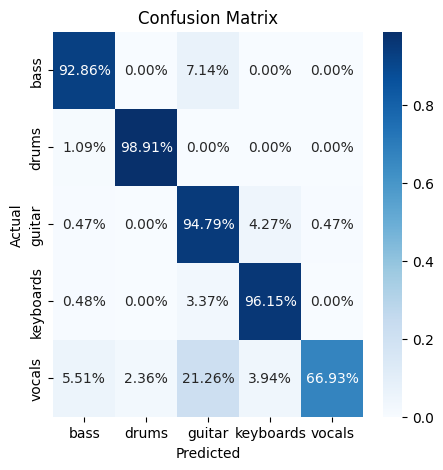

In [6]:
plot_confusion_matrix(y_test, rf.predict(X_test), data.labels)

In [7]:
print_classification_report(y_test, rf.predict(X_test), data.labels)

              precision    recall  f1-score   support

        bass       0.94      0.93      0.93       196
       drums       0.99      0.99      0.99       276
      guitar       0.81      0.95      0.87       211
   keyboards       0.93      0.96      0.95       208
      vocals       0.99      0.67      0.80       127

    accuracy                           0.92      1018
   macro avg       0.93      0.90      0.91      1018
weighted avg       0.93      0.92      0.92      1018



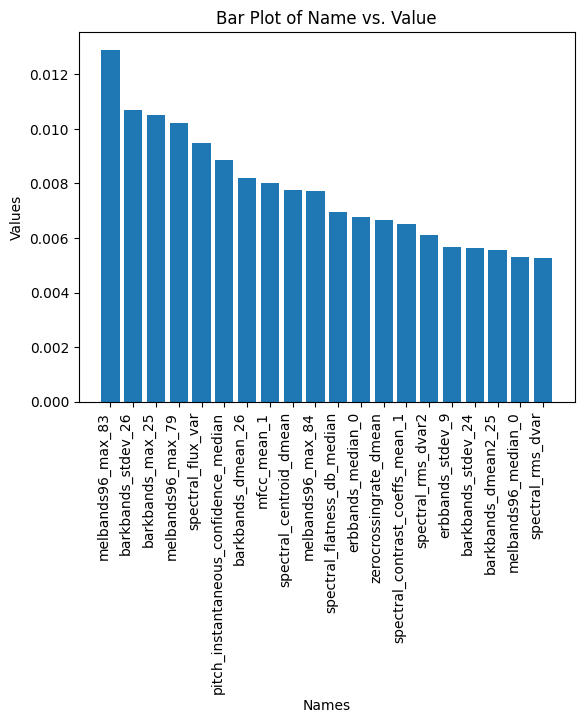

In [8]:
plot_feature_importance(rf.get_feature_importance(data.get_features_names()))

In [9]:
rf.save_model('../models/', 'rf_v1')

# SVC

In [10]:
svc = SVMClassifier()
svc.fit(X_train, y_train)

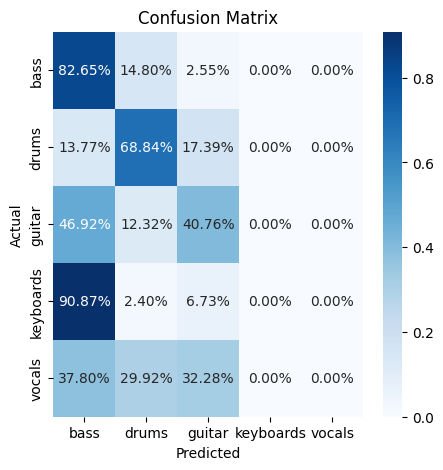

In [11]:
plot_confusion_matrix(y_test, svc.predict(X_test), data.labels)

In [12]:
print_classification_report(y_test, svc.predict(X_test), data.labels)

              precision    recall  f1-score   support

        bass       0.30      0.83      0.44       196
       drums       0.66      0.69      0.67       276
      guitar       0.44      0.41      0.42       211
   keyboards       0.00      0.00      0.00       208
      vocals       0.00      0.00      0.00       127

    accuracy                           0.43      1018
   macro avg       0.28      0.38      0.31      1018
weighted avg       0.33      0.43      0.36      1018



/Users/itallosilva/Workspace/indaband/track_classifier/.venv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/itallosilva/Workspace/indaband/track_classifier/.venv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/itallosilva/Workspace/indaband/track_classifier/.venv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` param

In [13]:
svc.save_model('../models/', 'svc_v1')

# XGBoost

In [15]:
xgb = XGBClassifier()
xgb.fit(*data.get_numpy_train_data())

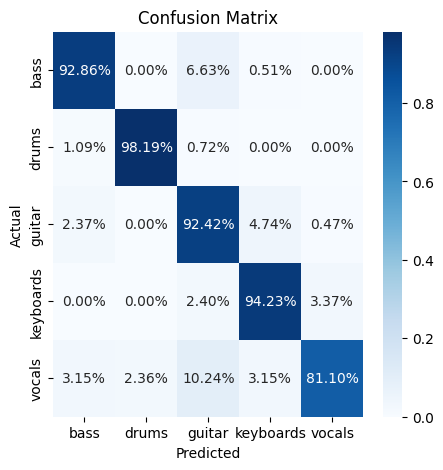

In [17]:
plot_confusion_matrix(y_test, xgb.predict(X_test), data.labels)

In [19]:
print_classification_report(y_test, xgb.predict(X_test), data.labels)

              precision    recall  f1-score   support

        bass       0.94      0.93      0.93       196
       drums       0.99      0.98      0.99       276
      guitar       0.86      0.92      0.89       211
   keyboards       0.93      0.94      0.94       208
      vocals       0.93      0.81      0.87       127

    accuracy                           0.93      1018
   macro avg       0.93      0.92      0.92      1018
weighted avg       0.93      0.93      0.93      1018



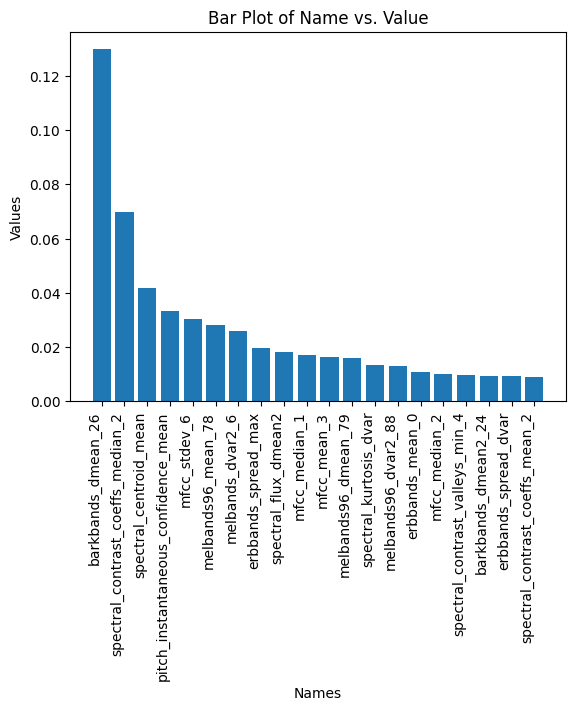

In [20]:
plot_feature_importance(xgb.get_feature_importance(data.get_features_names()))

In [19]:
xgb.save_model('../models/', 'xgb_v1')

# LightGBM

In [5]:
lgbm = LightGBMClassifier()
lgbm.fit(X_train, y_train)


[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.060532 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 668331
[LightGBM] [Info] Number of data points in the train set: 2243, number of used features: 2639
[LightGBM] [Info] Start training from score -1.529361
[LightGBM] [Info] Start training from score -1.165919
[LightGBM] [Info] Start training from score -1.471403
[LightGBM] [Info] Start training from score -2.056087
[LightGBM] [Info] Start training from score -2.170392
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, b

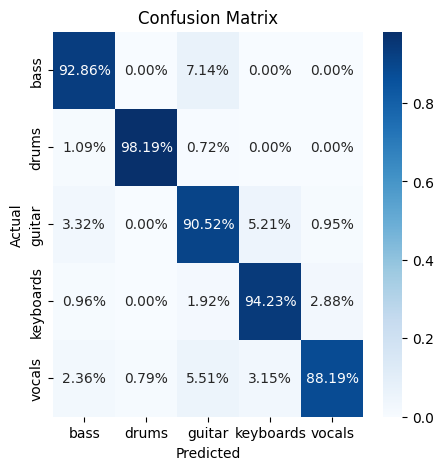

In [6]:
plot_confusion_matrix(y_test, lgbm.predict(X_test), data.labels)

In [7]:
print_classification_report(y_test, lgbm.predict(X_test), data.labels)

              precision    recall  f1-score   support

        bass       0.92      0.93      0.93       196
       drums       1.00      0.98      0.99       276
      guitar       0.88      0.91      0.89       211
   keyboards       0.93      0.94      0.94       208
      vocals       0.93      0.88      0.91       127

    accuracy                           0.94      1018
   macro avg       0.93      0.93      0.93      1018
weighted avg       0.94      0.94      0.94      1018



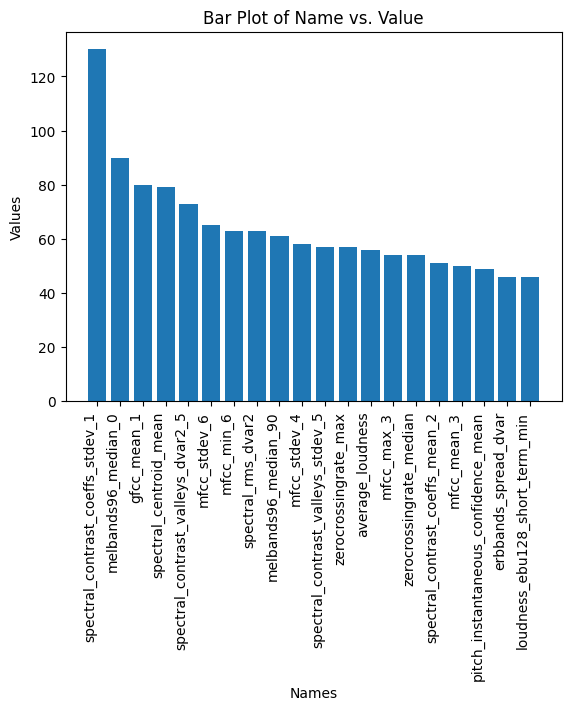

In [8]:
plot_feature_importance(lgbm.get_feature_importance(data.get_features_names()))

In [10]:
lgbm.save_model('../models/', 'lgbm_v1')